# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
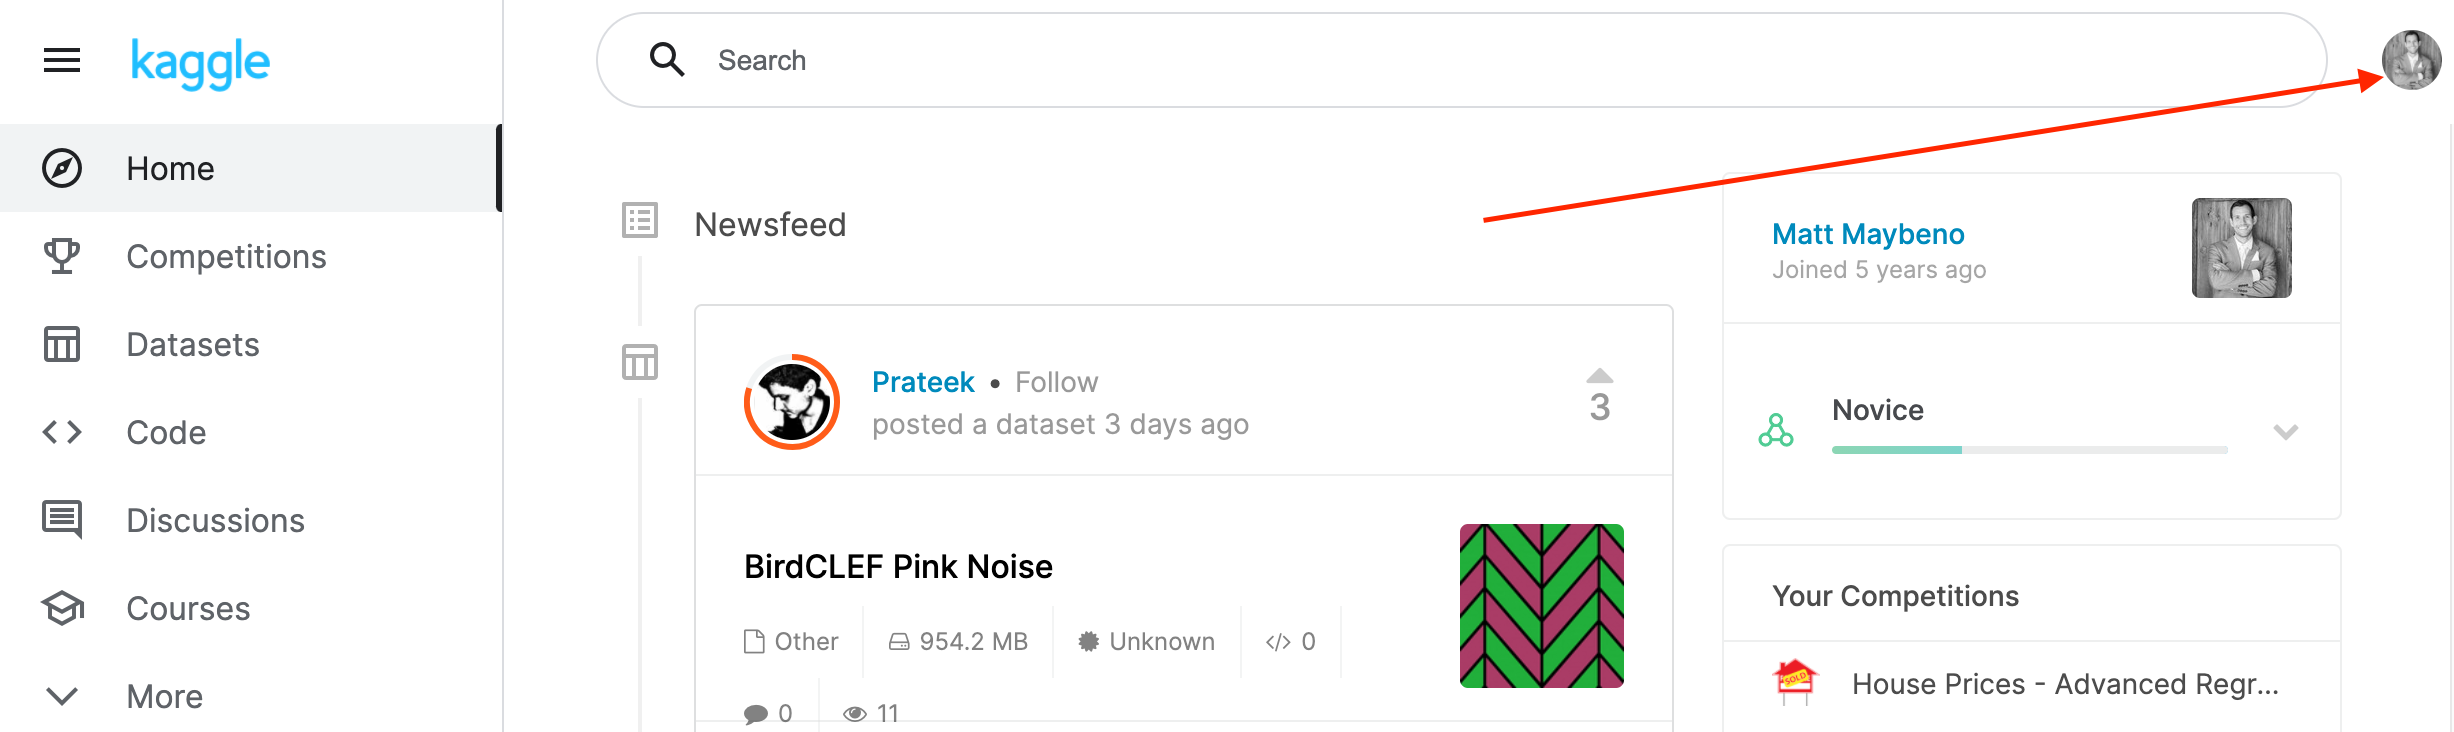
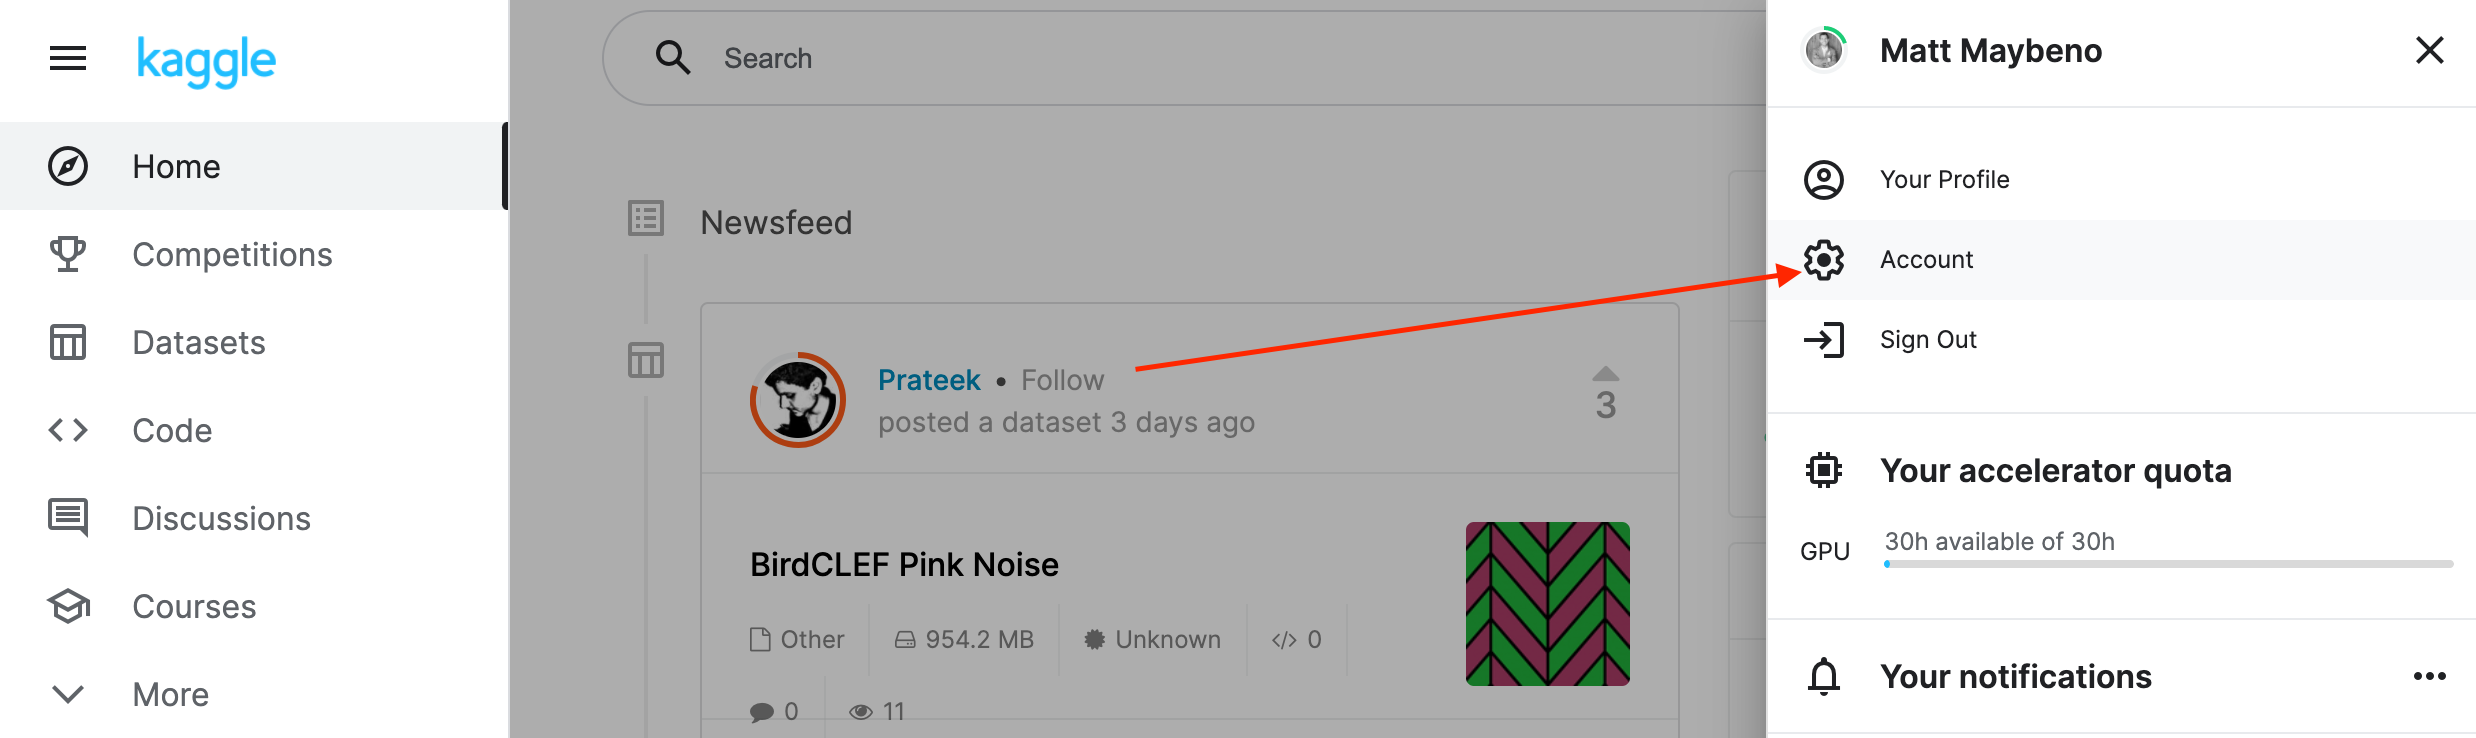
2. Scroll down to API and click Create New API Token.
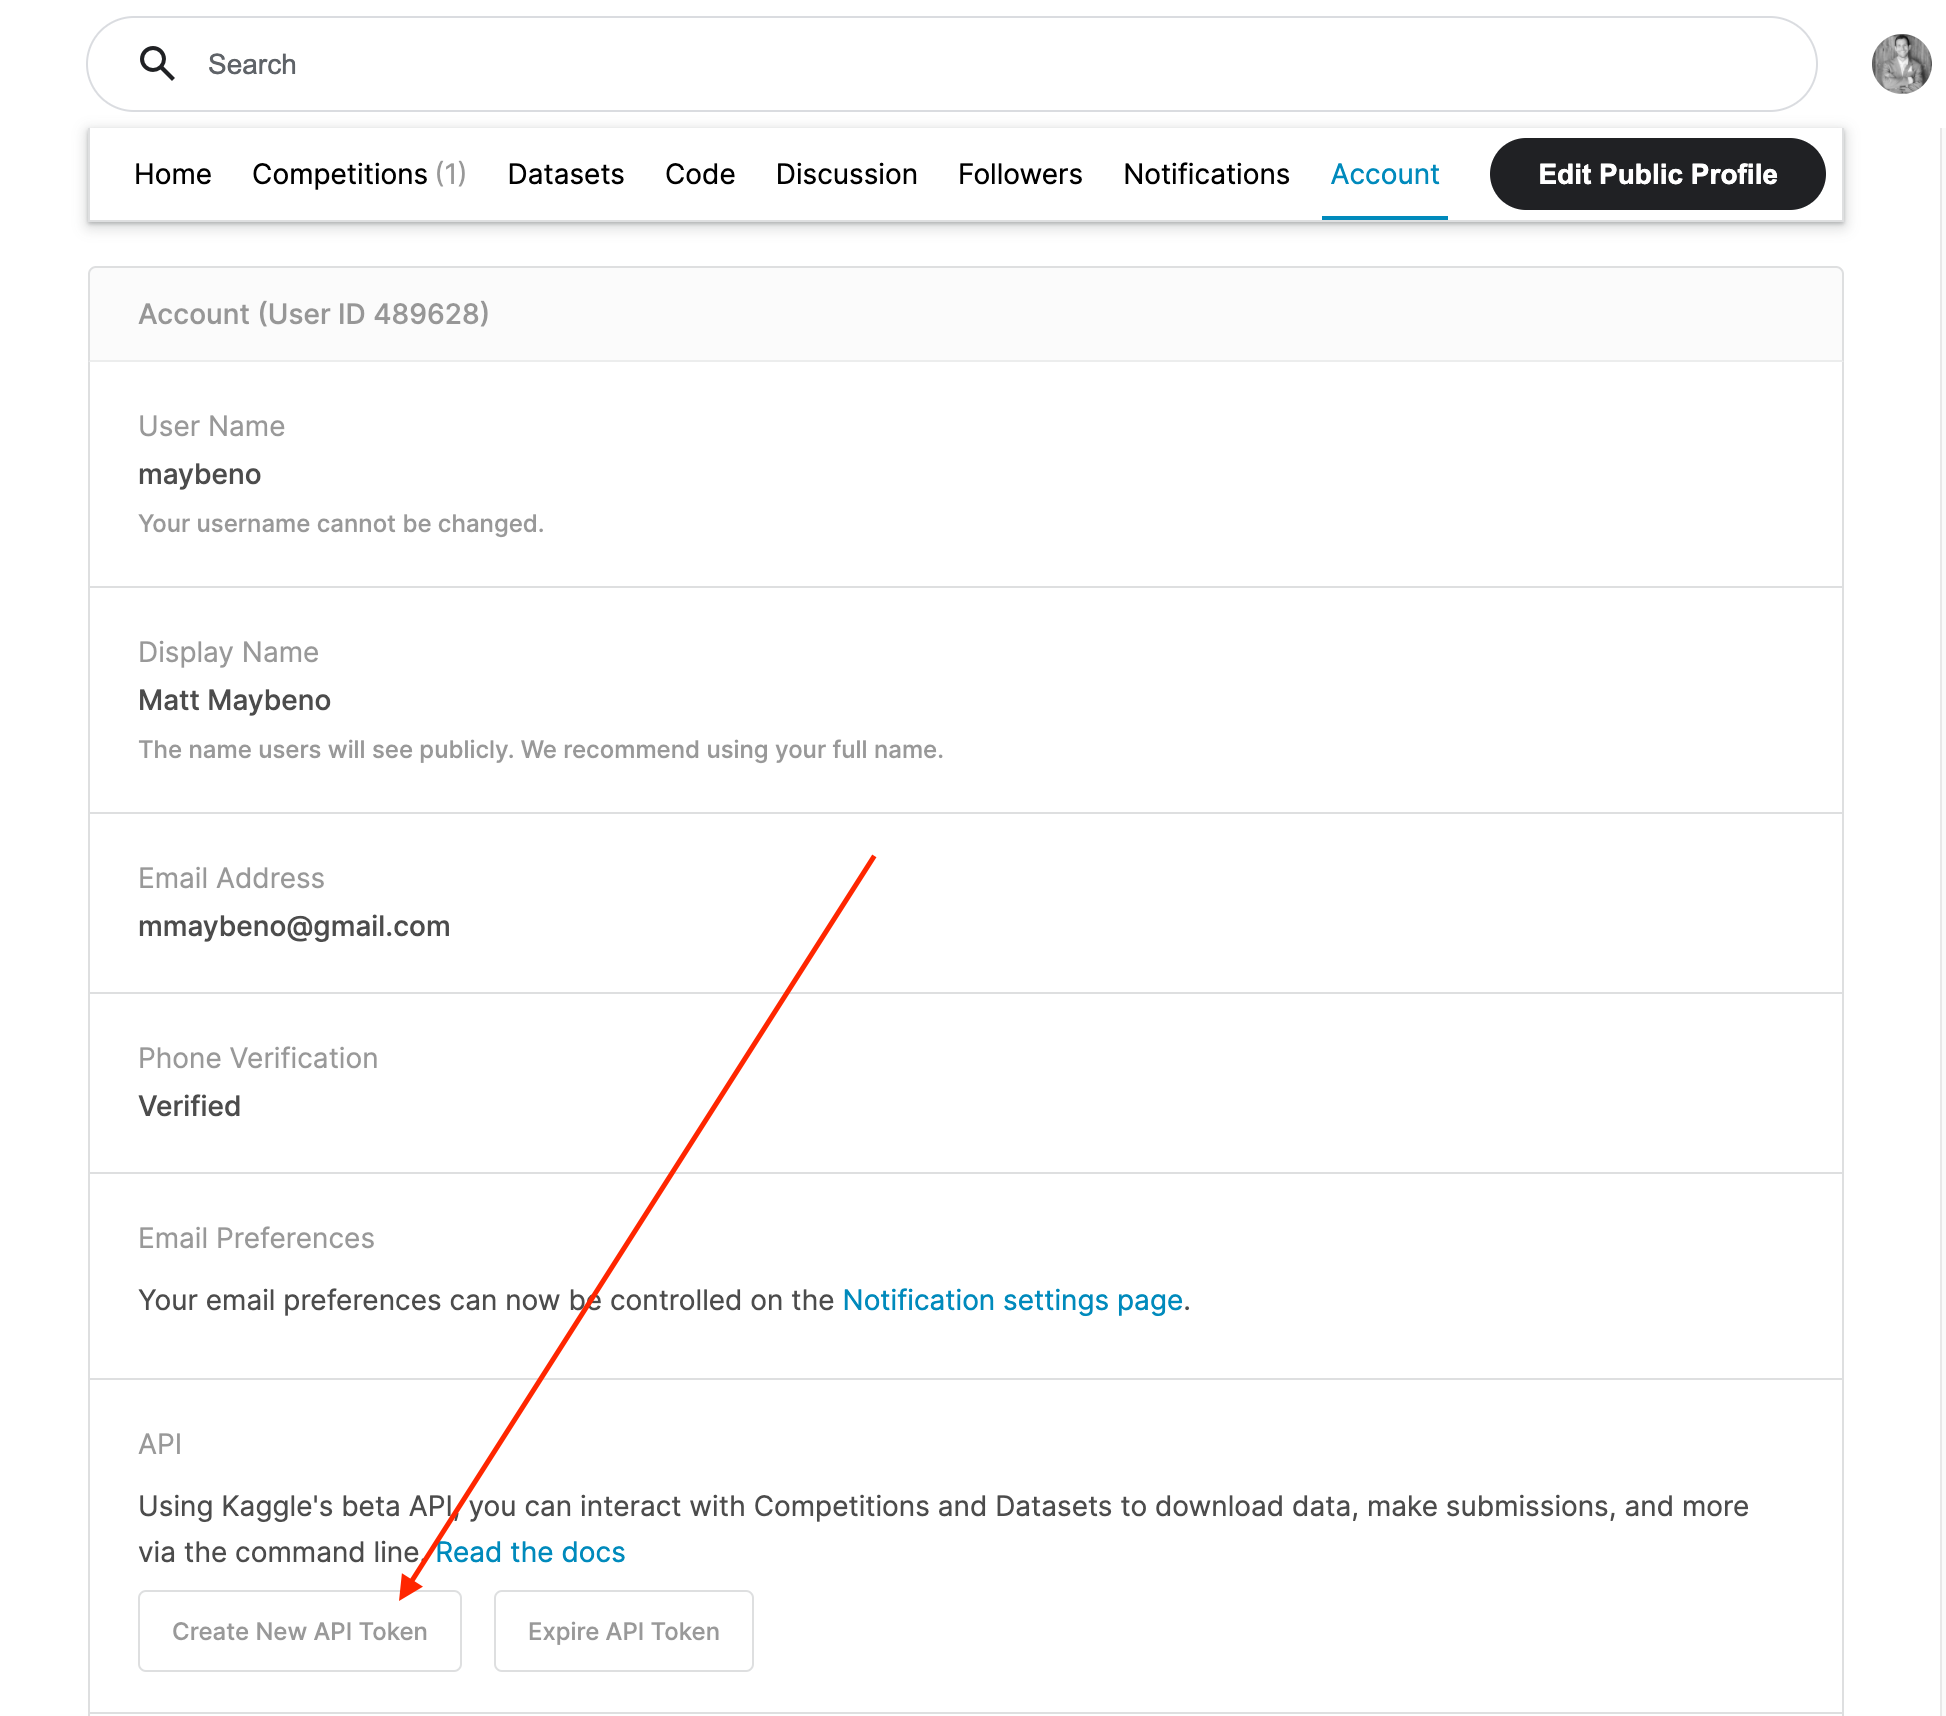
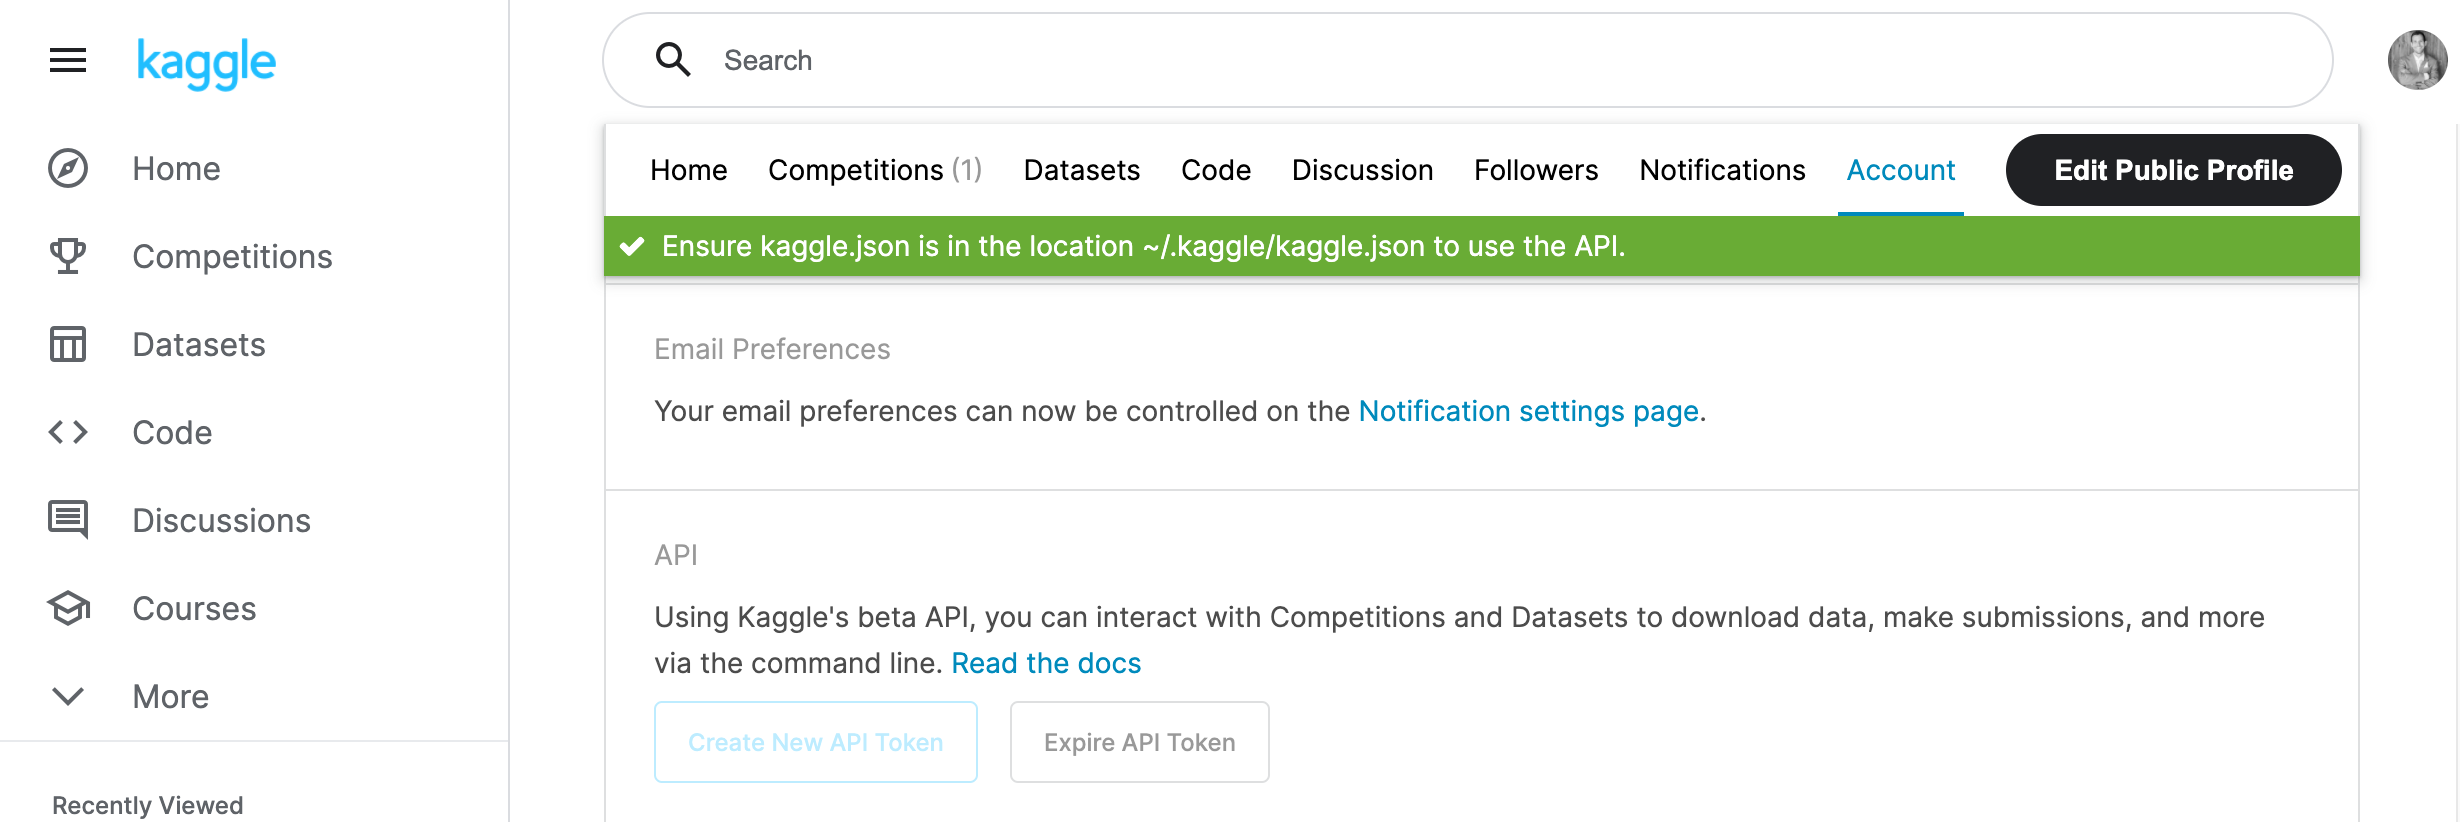
3. Open up `kaggle.json` and use the username and key.
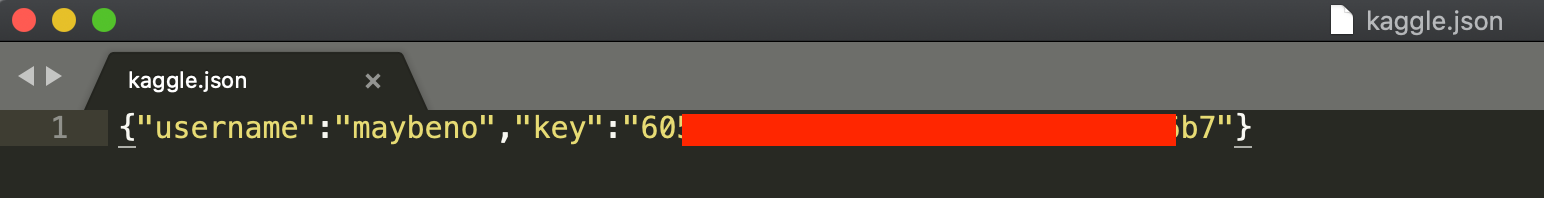

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080017 sha256=59738559fc10527f7d4b65ee90544d190a8f66b8faec1eb3fb1625ba5f56268b
  Stored in directory: /root/.cache/pip/wheels/df/5e/9c/8bd156f0e2

In [3]:
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.6/226.6 kB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.0/286.0 kB 302.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 223.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 134.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.7/289.7 kB 307.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 227.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 258.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 295.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 118.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 206.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 338.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 MB 200.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "emish8"
kaggle_key = "527d479f0f0eee6101da45b8ddf0872b"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
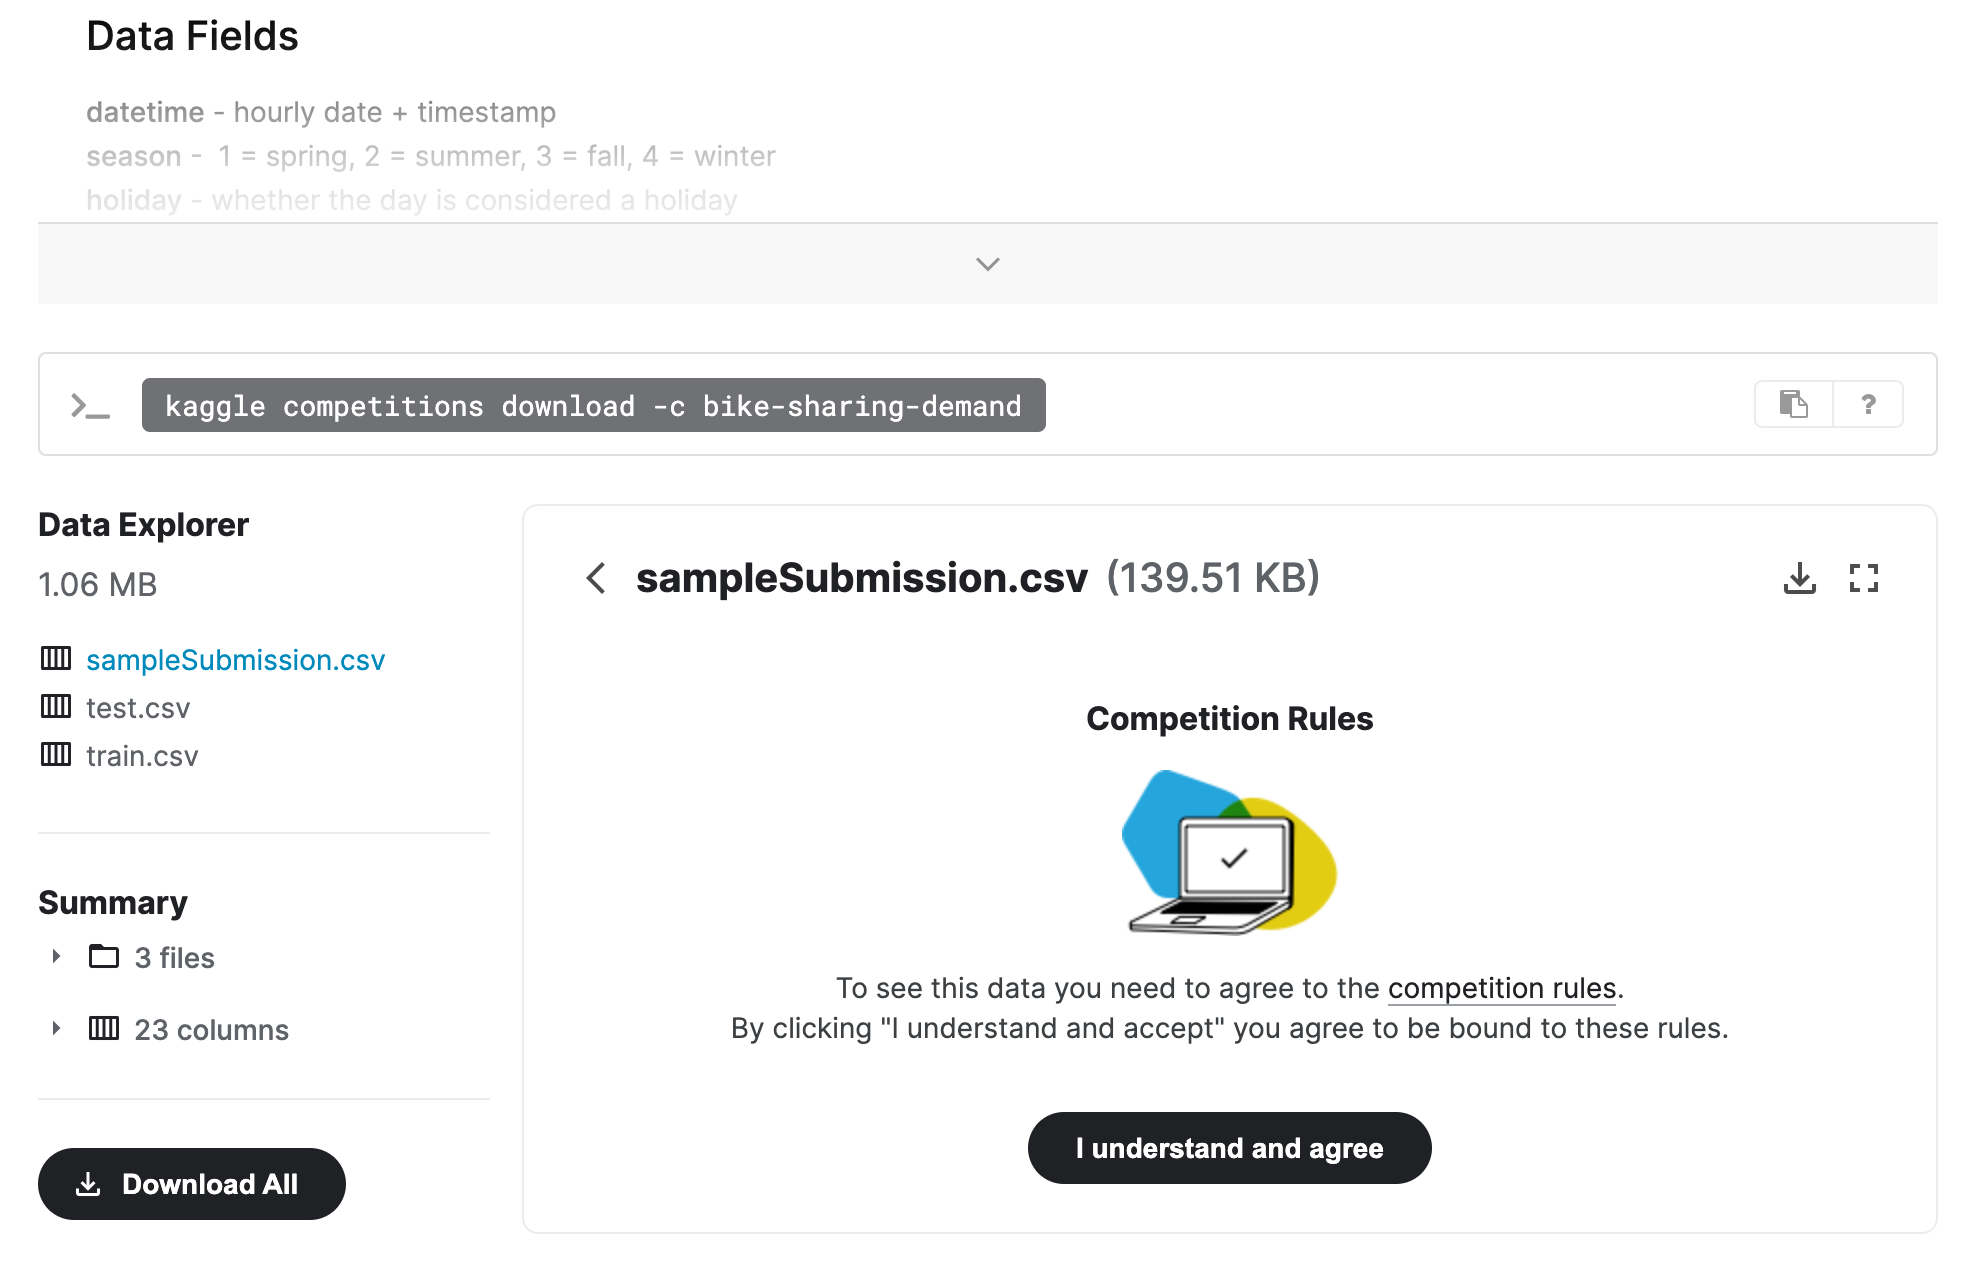

In [6]:
!pip install kaggle

  Using cached kaggle-1.5.12.tar.gz (58 kB)
  Preparing metadata (setup.py) ... done
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=07c60f04d03e1dabdc59d200f994dc313e2ae0bfb8eeec05d79195f0c1113b63
  Stored in directory: /root/.cache/pip/wheels/03/f3/c7/fc5a63bb33d22177609b06c5b4c714b5eb3f1b195ce9dc5e47
Successfully built kaggle


In [7]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
! kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
df_train = pd.read_csv('train.csv')
df_train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [10]:
df_train.shape

(10886, 12)

In [11]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
df_test = pd.read_csv('test.csv')
df_test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [12]:
df_test.shape

(6493, 9)

In [13]:
# Same thing as train and test dataset
submission =  pd.read_csv('sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [14]:
train1 = df_train.drop(columns=['casual', 'registered'])

In [15]:
train1.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  
0        81        0.0     16  
1        80        0.0     40  
2        80        0.0     32  
3        75        0.0     13  
4        75        0.0      1

In [16]:
from sklearn.model_selection import train_test_split
train1, val1 = train_test_split(train1, test_size= 0.1, random_state=32 )

In [17]:
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train1,
                                                time_limit=600, 
                                                presets= 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20221231_110211/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221231_110211/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    9797
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.8324, 181.48836)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Featu

TabularPredictor?

### Review AutoGluon's training run with ranking of models that did the best.

In [18]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -63.743147      10.722394  499.580752                0.000859           0.352889            3       True         18
1   RandomForestMSE_BAG_L2  -64.287996       9.885006  405.120084                0.553999          25.378081            2       True         14
2     ExtraTreesMSE_BAG_L2  -64.923072       9.894125  387.812818                0.563118           8.070815            2       True         16
3          LightGBM_BAG_L2  -65.761980       9.560037  402.475856                0.229030          22.733853            2       True         13
4          CatBoost_BAG_L2  -66.082461       9.375386  443.045113                0.044379          63.303110            2       True         15
5        LightGBMXT_BAG_L2  -70.113726      11.512462  422.302528         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_

<AxesSubplot:xlabel='model'>

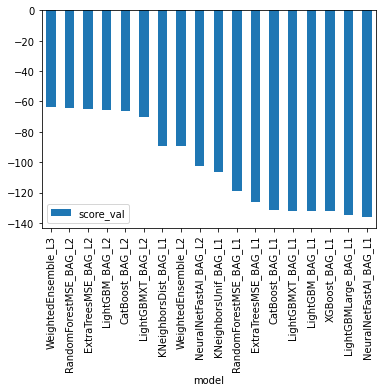

In [19]:
#model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [20]:
performance = predictor.evaluate(val1)   # model performance on val set

Evaluation: root_mean_squared_error on test data: -65.68378705534512
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -65.68378705534512,
    "mean_squared_error": -4314.359881931923,
    "mean_absolute_error": -40.61586913983684,
    "r2": 0.86383789902718,
    "pearsonr": 0.9295211543238041,
    "median_absolute_error": -22.327117919921875
}


### Create predictions from test dataset

In [21]:
predictions = predictor.predict(df_test)
predictions.head()

0    28.920952
1    40.111290
2    52.446003
3    53.359329
4    54.291031
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [22]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      115.808632
std       102.615891
min         4.193675
25%        21.312298
50%        83.171188
75%       191.015289
max       486.438660
Name: count, dtype: float64

In [23]:
# How many negative values do we have?
sum(predictions < 0)

0

No negative predicitons. But if they are, They will be set to zero.

In [24]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [25]:
submission["count"] =  predictions
submission.to_csv("submission.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 382kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [27]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 20

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-12-31 11:15:53  first raw submission               complete  1.80182      1.80182       
submission_new_hpo.csv       2022-12-29 14:07:37  new features with hyperparameters  complete  0.49030      0.49030       
submission_new_features.csv  2022-12-29 14:04:51  new features                       complete  0.49030      0.49030       
submission.csv               2022-12-29 14:02:14  first raw submission               complete  1.80853      1.80853       
submission_new_hpo.csv       2022-12-28 12:49:18  new features with hyperparameters  complete  0.91769      0.91769       
submission_new_hpo.csv       2022-12-28 12:32:02  new features with hyperparameters  complete  0.61944      0.61944       
submission_new_h

#### Initial score of  1.80

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

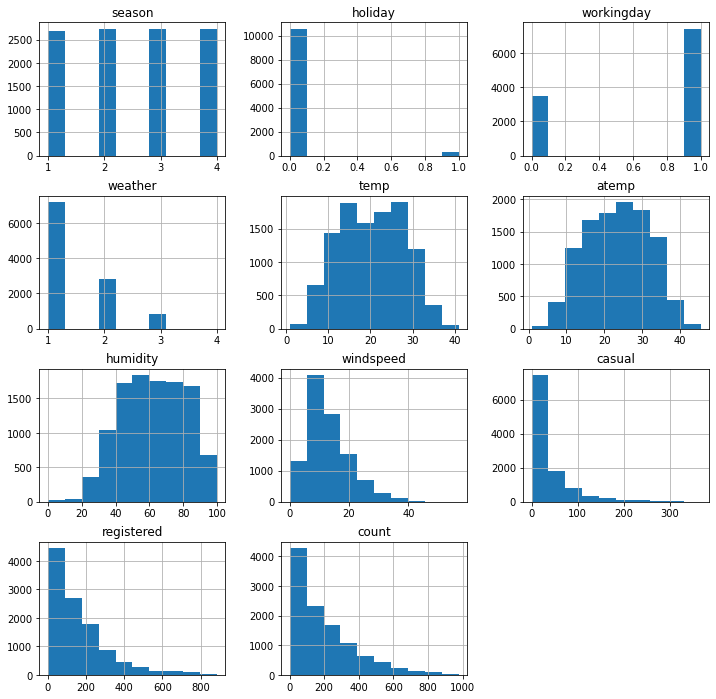

In [28]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
df_train.hist(figsize=(12,12));

In [29]:
#setting datetime as datetime object
df_train['datetime'] = pd.to_datetime(df_train.loc[:, "datetime"])
df_test['datetime'] = pd.to_datetime(df_test.loc[:, "datetime"])

In [30]:
df_train.info()   # changed datetime data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [31]:
df_train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [32]:
df_train['temp_diff'] = df_train['temp']-df_train['atemp']
df_test['temp_diff'] = df_test['temp']-df_test['atemp']
(df_train['temp_diff']).describe()

count    10886.000000
mean        -3.424224
std          1.566612
min         -8.045000
25%         -4.055000
50%         -3.680000
75%         -2.745000
max         23.140000
Name: temp_diff, dtype: float64

In [33]:
df_train[['count', 'temp_diff', 'atemp', 'temp']].corr()

count  temp_diff     atemp      temp
count      1.000000  -0.146716  0.389784  0.394454
temp_diff -0.146716   1.000000 -0.510840 -0.354556
atemp      0.389784  -0.510840  1.000000  0.984948
temp       0.394454  -0.354556  0.984948  1.000000

In [34]:
df_train[['temp', 'atemp']].corr() 

temp     atemp
temp   1.000000  0.984948
atemp  0.984948  1.000000

In [35]:
# create a new feature, extracting year, month, day, weekday and hour

#train data
df_train["year"] = df_train.datetime.dt.year
df_train["month"] = df_train.datetime.dt.month
df_train["day"] = df_train.datetime.dt.day
df_train['hour'] = df_train.datetime.dt.hour
df_train['weekday'] = df_train.datetime.dt.weekday

#test data
df_test['year'] = df_test.datetime.dt.year
df_test['month'] = df_test.datetime.dt.month
df_test['day'] = df_test.datetime.dt.day
df_test['hour'] = df_test.datetime.dt.hour
df_test['weekday'] = df_test.datetime.dt.weekday

In [36]:
#checking unique years in data
print('years in train data',df_train['year'].unique())
print('years in test data', df_test['year'].unique())

years in train data [2011 2012]
years in test data [2011 2012]


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [37]:
# setting season and weather to categories

#train data
df_train["season"] =  df_train["season"].astype('category') 
df_train["weather"] = df_train["weather"].astype('category') 

#test data
df_test["season"] = df_test["season"].astype('category')
df_test["weather"] = df_test["season"].astype('category')

In [38]:
# One-Hot Encoding

#train data
weather_one_hot_train = pd.get_dummies(df_train.weather, prefix="weather")
season_one_hot_train = pd.get_dummies(df_train.season, prefix="season")

#test data
weather_one_hot_test = pd.get_dummies(df_test.weather, prefix="weather")
season_one_hot_test = pd.get_dummies(df_test.season, prefix="season")

In [39]:
# adding codes to data 

#train
df_train[weather_one_hot_train.columns.tolist()] = weather_one_hot_train
df_train[season_one_hot_train.columns.tolist()] = season_one_hot_train

#test
df_test[weather_one_hot_train.columns.tolist()] = weather_one_hot_test
df_test[season_one_hot_train.columns.tolist()] = season_one_hot_test

Text(0.5, 1.0, 'Data Correlation')

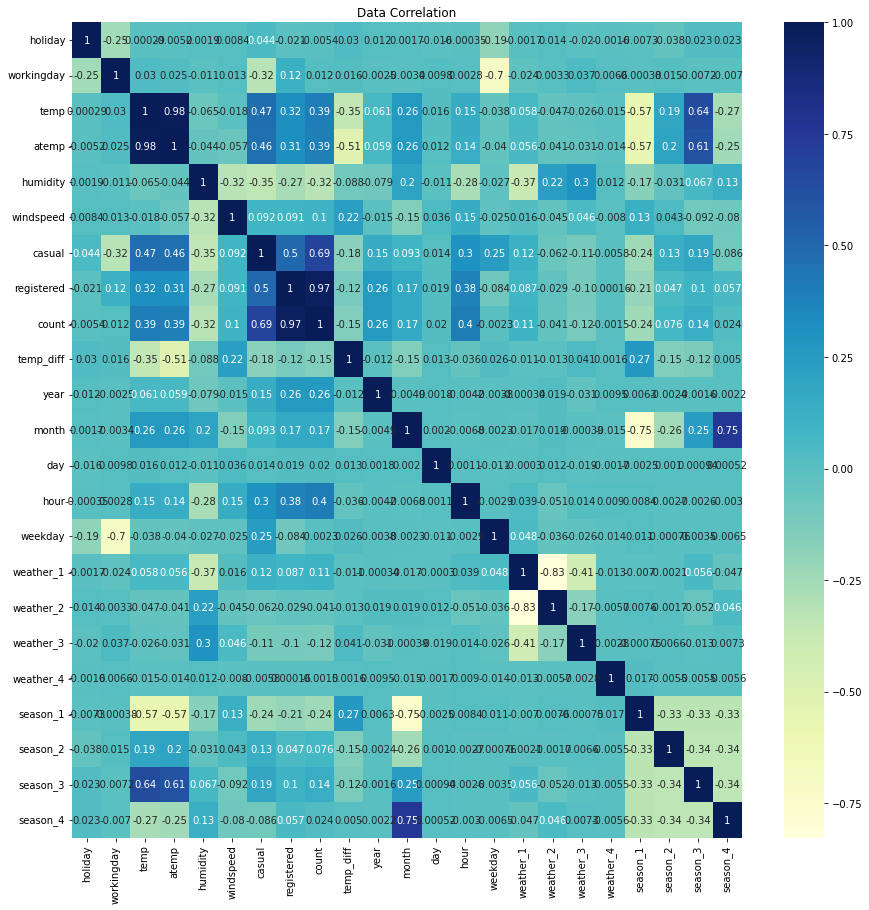

In [40]:
# correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True) 
plt.title("Data Correlation")

In [41]:
df_train.corr()

holiday  workingday      temp     atemp  humidity  windspeed  \
holiday     1.000000   -0.250491  0.000295 -0.005215  0.001929   0.008409   
workingday -0.250491    1.000000  0.029966  0.024660 -0.010880   0.013373   
temp        0.000295    0.029966  1.000000  0.984948 -0.064949  -0.017852   
atemp      -0.005215    0.024660  0.984948  1.000000 -0.043536  -0.057473   
humidity    0.001929   -0.010880 -0.064949 -0.043536  1.000000  -0.318607   
windspeed   0.008409    0.013373 -0.017852 -0.057473 -0.318607   1.000000   
casual      0.043799   -0.319111  0.467097  0.462067 -0.348187   0.092276   
registered -0.020956    0.119460  0.318571  0.314635 -0.265458   0.091052   
count      -0.005393    0.011594  0.394454  0.389784 -0.317371   0.101369   
temp_diff   0.029675    0.015634 -0.354556 -0.510840 -0.087518   0.222113   
year        0.012021   -0.002482  0.061226  0.058540 -0.078606  -0.015221   
month       0.001731   -0.003394  0.257589  0.264173  0.204537  -0.150192   
day        -0.015877    0.009829  0.015551  0.011866 -0.011335   0.036157   
hour       -0.000354    0.002780  0.145430  0.140343 -0.278011   0.146631   
weekday    -0.191832   -0.704267 -0.038466 -0.040235 -0.026507  -0.024804   
weather_1  -0.001708   -0.024078  0.058430  0.055825 -0.374837   0.015920   
weather_2   0.013868    0.003324 -0.046925 -0.040792  0.222398  -0.045016   
weather_3  -0.019514    0.036643 -0.025715 -0.031154  0.295894   0.045597   
weather_4  -0.001644    0.006562 -0.014800 -0.013901  0.012010  -0.007979   
season_1   -0.007336   -0.000379 -0.565655 -0.569082 -0.166208   0.128819   
season_2   -0.038250    0.014620  0.192661  0.204421 -0.031095   0.042991   
season_3    0.022790   -0.007194  0.635975  0.607090  0.067308  -0.091521   
season_4    0.022751   -0.007048 -0.266220 -0.245690  0.129018  -0.079535   

              casual  registered     count  temp_diff  ...      hour  \
holiday     0.043799   -0.020956 -0.005393   0.029675  ... -0.000354   
workingday -0.319111    0.119460  0.011594   0.015634  ...  0.002780   
temp        0.467097    0.318571  0.394454  -0.354556  ...  0.145430   
atemp       0.462067    0.314635  0.389784  -0.510840  ...  0.140343   
humidity   -0.348187   -0.265458 -0.317371  -0.087518  ... -0.278011   
windspeed   0.092276    0.091052  0.101369   0.222113  ...  0.146631   
casual      1.000000    0.497250  0.690414  -0.176432  ...  0.302045   
registered  0.497250    1.000000  0.970948  -0.117599  ...  0.380540   
count       0.690414    0.970948  1.000000  -0.146716  ...  0.400601   
temp_diff  -0.176432   -0.117599 -0.146716   1.000000  ... -0.035886   
year        0.145241    0.264265  0.260403  -0.012162  ... -0.004234   
month       0.092722    0.169451  0.166862  -0.147918  ... -0.006818   
day         0.014109    0.019111  0.019826   0.013150  ...  0.001132   
hour        0.302045    0.380540  0.400601  -0.035886  ...  1.000000   
weekday     0.246959   -0.084427 -0.002283   0.026340  ... -0.002925   
weather_1   0.119728    0.086621  0.105246  -0.011383  ...  0.038791   
weather_2  -0.062184   -0.028997 -0.041329  -0.012717  ... -0.050671   
weather_3  -0.108853   -0.104936 -0.117519   0.040636  ...  0.014030   
weather_4  -0.005760    0.000155 -0.001459   0.001586  ...  0.008951   
season_1   -0.235222   -0.207278 -0.237704   0.265154  ...  0.008357   
season_2    0.132405    0.046969  0.075681  -0.147611  ... -0.002733   
season_3    0.187726    0.102142  0.136942  -0.121021  ... -0.002611   
season_4   -0.086258    0.056961  0.023704   0.005011  ... -0.002964   

             weekday  weather_1  weather_2  weather_3  weather_4  season_1  \
holiday    -0.191832  -0.001708   0.013868  -0.019514  -0.001644 -0.007336   
workingday -0.704267  -0.024078   0.003324   0.036643   0.006562 -0.000379   
temp       -0.038466   0.058430  -0.046925  -0.025715  -0.014800 -0.565655   
atemp      -0.040235   0.055825  -0.040792  -0.031154  -0.013901 -0.569082   
humidity   -0.026507  -0.374837   0.222398   

In [42]:
# View are new feature
df_train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  ...  hour  weekday  weather_1  weather_2  \
0        81        0.0       3  ...     0        5          1          0   
1        80        0.0       8  ...     1        5          1          0   
2        80        0.0       5  ...     2        5          1          0   
3        75        0.0       3  ...     3        5          1          0   
4        75        0.0       0  ...     4        5          1          0   

   weather_3  weather_4  season_1  season_2  season_3  season_4  
0          0          0         1         0         0         0  
1          0          0         1         0         0         0  
2          0          0         1         0         0         0  
3          0          0         1         0         0         0  
4          0          0         1         0         0         0  

[5 rows x 26 columns]

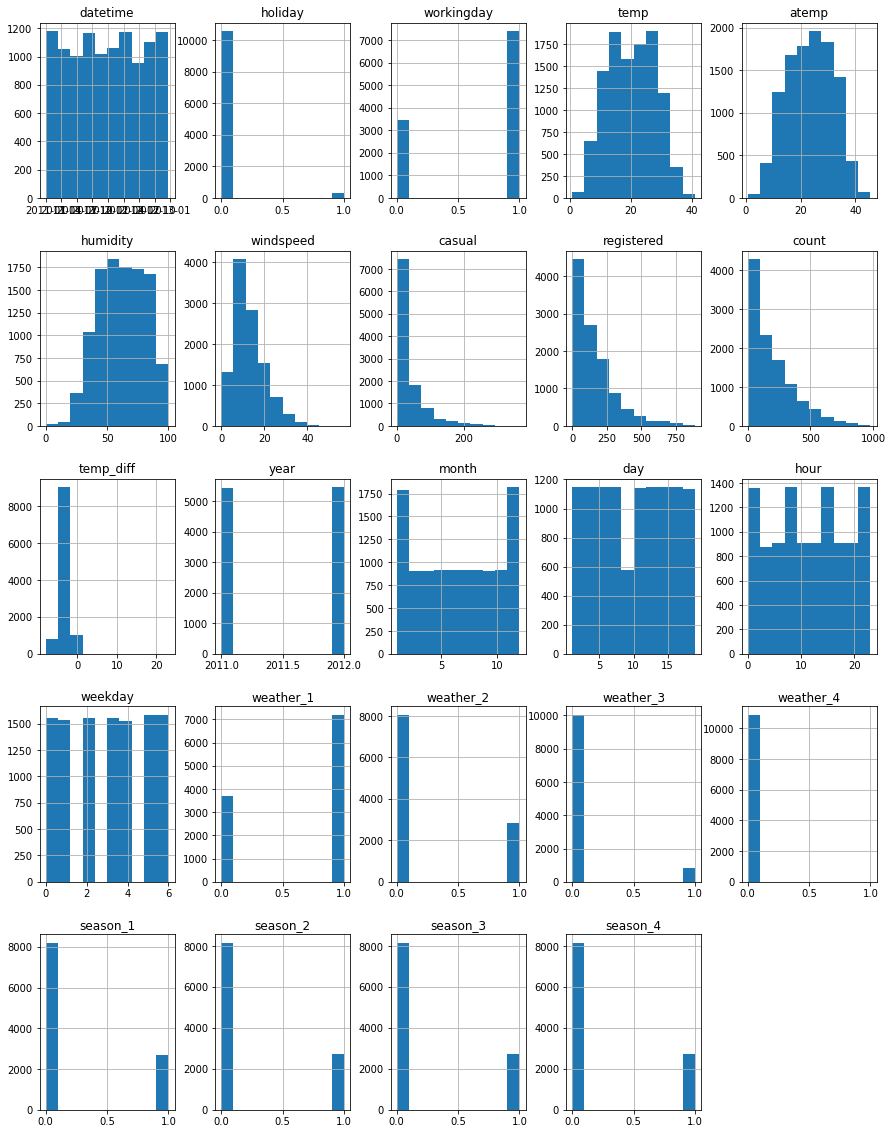

In [43]:
# View histogram of all features again now with the hour feature
df_train.hist(figsize=(15,20));

## Step 5: Rerun the model with the same settings as before, just with more features

In [44]:
drop_columns = [ 'datetime','atemp', 'registered', 'casual', 'weather', 'season']
train2 = df_train.drop(columns= drop_columns)

In [45]:
train2, val2= train_test_split(train2, test_size=0.1, random_state=32)

In [46]:
train2.head()

holiday  workingday   temp  humidity  windspeed  count  temp_diff  year  \
3977        0           1  21.32        52    11.0014    482     -3.680  2011   
5087        0           1  18.86        88    19.9995     16     -3.865  2011   
2758        0           0  27.06        83     0.0000    176     -3.245  2011   
4861        0           1  22.14        60     8.9981    191     -3.620  2011   
9080        0           0  33.62        52     0.0000    463     -5.015  2012   

      month  day  hour  weekday  weather_1  weather_2  weather_3  weather_4  \
3977      9   16    18        4          0          1          0          0   
5087     12    6     1        1          0          1          0          0   
2758      7    3    20        6          0          0          1          0   
4861     11   15    15        1          0          1          0          0   
9080      9    1    17        5          0          1          0          0   

      season_1  season_2  season_3  season_4  
3977         0         0         1         0  
5087         0         0         0         1  
2758         0         0         1         0  
4861         0         0         0         1  
9080         0         0         1         0

In [139]:
train2.shape

(9797, 20)

In [141]:
train1.shape

(9797, 10)

In [47]:
predictor_new_features = (TabularPredictor( label='count', 
                                            eval_metric='root_mean_squared_error'
                                          ).fit( train_data = train2,
                                                 time_limit=600, 
                                                 presets= 'best_quality'))

No path specified. Models will be saved in: "AutogluonModels/ag-20221231_111646/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20221231_111646/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    9797
Train Data Columns: 19
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.8324, 181.48836)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feat

In [49]:
predictor_new_features.fit_summary()

# Output the model's `score_val` in a bar chart to compare performance
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [50]:
# Evaluate the models performance on the val dataset
performance = predictor_new_features.evaluate(val2)

Evaluation: root_mean_squared_error on test data: -32.02542799528871
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -32.02542799528871,
    "mean_squared_error": -1025.6280382814218,
    "mean_absolute_error": -19.59688339548663,
    "r2": 0.9676309644232794,
    "pearsonr": 0.9836999201382235,
    "median_absolute_error": -10.8243408203125
}


In [51]:
train_performance = predictor_new_features.evaluate(train2)

Evaluation: root_mean_squared_error on test data: -14.68641197122371
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -14.68641197122371,
    "mean_squared_error": -215.69069658850307,
    "mean_absolute_error": -9.18562297392977,
    "r2": 0.9934509520367549,
    "pearsonr": 0.9967246673915497,
    "median_absolute_error": -5.36236572265625
}


In [52]:
test = df_test.drop(columns=['datetime','atemp', 'weather', 'season'])

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  temp_diff   10886 non-null  float64       
 13  year        10886 non-null  int64         
 14  month       10886 non-null  int64         
 15  day         10886 non-null  int64         
 16  hour        10886 non-

In [54]:
test.head()

holiday  workingday   temp  humidity  windspeed  temp_diff  year  month  \
0        0           1  10.66        56    26.0027     -0.705  2011      1   
1        0           1  10.66        56     0.0000     -2.975  2011      1   
2        0           1  10.66        56     0.0000     -2.975  2011      1   
3        0           1  10.66        56    11.0014     -2.220  2011      1   
4        0           1  10.66        56    11.0014     -2.220  2011      1   

   day  hour  weekday  weather_1  weather_2  weather_3  weather_4  season_1  \
0   20     0        3          1          0          0          0         1   
1   20     1        3          1          0          0          0         1   
2   20     2        3          1          0          0          0         1   
3   20     3        3          1          0          0          0         1   
4   20     4        3          1          0          0          0         1   

   season_2  season_3  season_4  
0         0         0         0  
1         0         0         0  
2         0         0         0  
3         0         0         0  
4         0         0         0

In [55]:
# Remember to set all negative values to zero
pred = predictor_new_features.predict(test)

In [56]:
pred[pred<0] =0

In [57]:
# Same submitting predictions
submission_new_features  = pd.DataFrame()
submission_new_features["datetime"] = submission['datetime']
submission_new_features["count"] = pred
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 186k/186k [00:00<00:00, 403kB/s]
Successfully submitted to Bike Sharing Demand

In [59]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 10

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-12-31 11:28:31  new features                       complete  0.77978      0.77978       
submission.csv               2022-12-31 11:15:53  first raw submission               complete  1.80182      1.80182       
submission_new_hpo.csv       2022-12-29 14:07:37  new features with hyperparameters  complete  0.49030      0.49030       
submission_new_features.csv  2022-12-29 14:04:51  new features                       complete  0.49030      0.49030       
submission.csv               2022-12-29 14:02:14  first raw submission               complete  1.80853      1.80853       
submission_new_hpo.csv       2022-12-28 12:49:18  new features with hyperparameters  complete  0.91769      0.91769       
submission_new_h

#### New Score of 0.77978

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [114]:
predictor_new_hpo = (TabularPredictor(label='count', 
                                      eval_metric='root_mean_squared_error'
                                     ).fit( train_data = train2,
                                            time_limit=900,
                                            auto_stack = True,
                                           refit_full  = True,
                                            set_best_to_refit_full = True, 
                                            presets= 'best_quality'))

No path specified. Models will be saved in: "AutogluonModels/ag-20221231_141502/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20221231_141502/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    9797
Train Data Columns: 19
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.8324, 181.48836)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feat

In [115]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3  -32.973919      13.184782  734.866027                0.000739           0.425476            3       True         20
1           WeightedEnsemble_L2  -33.190594      10.685922  485.006700                0.000743           0.498074            2       True         11
2               CatBoost_BAG_L2  -33.269328      11.633189  616.252511                0.053344          32.899129            2       True         15
3          ExtraTreesMSE_BAG_L2  -33.288274      12.149610  592.096450                0.569765           8.743068            2       True         16
4        NeuralNetFastAI_BAG_L2  -33.743686      11.995817  664.837863                0.415973          81.484481            2       True         17
5               LightGBM_BAG_L2  -33.762019 

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'Ligh

In [134]:
predictor_new_hpo.fit_summary().keys()

*** Summary of fit() ***
Estimated performance of each model:
                          model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L3  -32.973919      13.184782  734.866027                0.000739           0.425476            3       True         20
1           WeightedEnsemble_L2  -33.190594      10.685922  485.006700                0.000743           0.498074            2       True         11
2               CatBoost_BAG_L2  -33.269328      11.633189  616.252511                0.053344          32.899129            2       True         15
3          ExtraTreesMSE_BAG_L2  -33.288274      12.149610  592.096450                0.569765           8.743068            2       True         16
4        NeuralNetFastAI_BAG_L2  -33.743686      11.995817  664.837863                0.415973          81.484481            2       True         17
5               LightGBM_BAG_L2  -33.762019 

dict_keys(['model_types', 'model_performance', 'model_best', 'model_paths', 'model_fit_times', 'model_pred_times', 'num_bag_folds', 'max_stack_level', 'model_hyperparams', 'leaderboard'])

In [137]:
predictor_new_hpo.get_model_best

<bound method TabularPredictor.get_model_best of <autogluon.tabular.predictor.predictor.TabularPredictor object at 0x7f170f4940d0>>

<AxesSubplot:xlabel='model'>

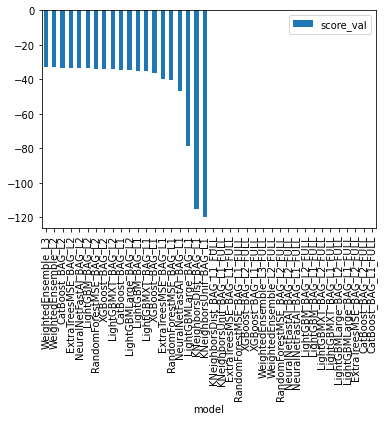

In [116]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [117]:
# Evaluate the models performance on the test dataset
performance = predictor_new_hpo.evaluate(val2)

Evaluation: root_mean_squared_error on test data: -32.35343398574848
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -32.35343398574848,
    "mean_squared_error": -1046.744690670185,
    "mean_absolute_error": -19.98146715461934,
    "r2": 0.966964518453668,
    "pearsonr": 0.9834869735352764,
    "median_absolute_error": -11.636301040649414
}


In [118]:
# Remember to set all negative values to zero
pred2 = predictor_new_hpo.predict(test)

In [119]:
pred2[pred2<0] =0

In [120]:
# Same submitting predictions
submission_new_hpo  = pd.DataFrame()
submission_new_hpo["datetime"] = submission['datetime']
submission_new_hpo["count"] = pred2
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [121]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 182k/182k [00:00<00:00, 386kB/s]
Successfully submitted to Bike Sharing Demand

In [122]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 20

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-12-31 14:56:10  new features with hyperparameters  complete  1.83235      1.83235       
submission_new_hpo.csv       2022-12-31 14:10:24  new features with hyperparameters  complete  1.24540      1.24540       
submission_new_hpo.csv       2022-12-31 13:34:17  new features with hyperparameters  complete  0.62032      0.62032       
submission_new_hpo.csv       2022-12-31 13:20:20  new features with hyperparameters  complete  1.24540      1.24540       
submission_new_hpo.csv       2022-12-31 13:18:52  new features with hyperparameters  error                                
submission_new_hpo.csv       2022-12-31 12:02:43  new features with hyperparameters  error                                
submission_new_f

#### New Score of 1.2494

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

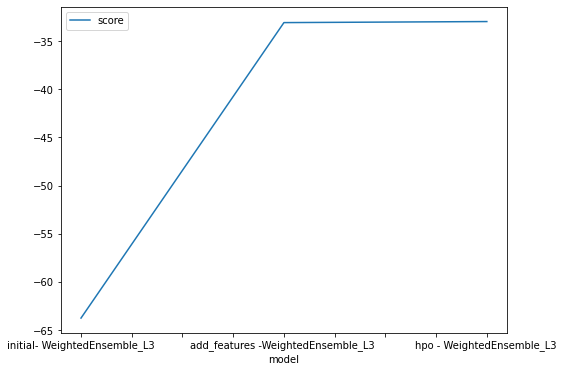

In [138]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial- WeightedEnsemble_L3", "add_features -WeightedEnsemble_L3 ", "hpo - WeightedEnsemble_L3 "],
        "score": [ -63.743147, -33.082877, -32.973919 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

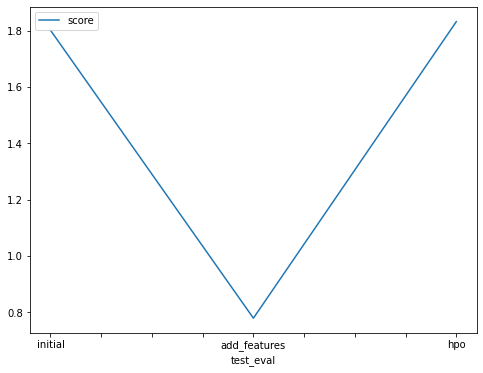

In [124]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80182, 0.77978, 1.83236]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [128]:
# The 3 hyperparameters we tuned with the kaggle score as the result
model_settings = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "eval_metric": ['root_mean_squared_error', 'root_mean_squared_error', 'root_mean_squared_error'],
    "presets": ['best_quality', 'best_quality', 'best_quality'],
    "time_limit": [600, 600, 900],
    "auto_stack": [False,False, True ],
    "refit_full" :[False,False, True ],
     "set_best_to_refit_full" :[False,False, True ],
    "score": [1.80182, 0.77978, 1.83236]
})

model_settings

model              eval_metric       presets  time_limit  \
0       initial  root_mean_squared_error  best_quality         600   
1  add_features  root_mean_squared_error  best_quality         600   
2           hpo  root_mean_squared_error  best_quality         900   

   auto_stack  refit_full  set_best_to_refit_full    score  
0       False       False                   False  1.80182  
1       False       False                   False  0.77978  
2        True        True                    True  1.83236

In [129]:
model_settings.to_csv(index=False)

'model,eval_metric,presets,time_limit,auto_stack,refit_full,set_best_to_refit_full,score\ninitial,root_mean_squared_error,best_quality,600,False,False,False,1.80182\nadd_features,root_mean_squared_error,best_quality,600,False,False,False,0.77978\nhpo,root_mean_squared_error,best_quality,900,True,True,True,1.83236\n'